# PRA 2 Tipologia y ciclo de vida de los datos

## Carlos Chamorro

## UOC

### 1. Descripcion del dataset

Para la realización de esta práctica, se ha seleccionado un conjunto de datos obtenido de la plataforma Kaggle llamado FitBit Fitness Tracker Data, el cual contiene información proveniente de los smartwatch FitBit, el cual registra diferentes tipos de datos sobre la salud y el nivel de atletismo de las personas que los usan. Este dataset es de libre acceso a través de la plataforma y ha sido ampliamente usado por estudiantes o aficionados para realizar casos de estudio. Con este dataset se pueden tratar de responder diferentes preguntas relacionadas con el deporte, la nutrición y el consumo y gasto de energía por parte de las personas. En este caso, trataremos de responder a la siguiente pregunta: Podemos establecer una relación entre las horas de sueño y el consumo de calorías?

Antes de proseguir, importamos las librerías que usaremos a lo largo del análisis.

In [1]:
import pandas as pd
import csv
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statistics
import seaborn as sns

### 2. Integración y selección de los datos a analizar

El archivo original obtenido de Kaggle contiene un gran numero de datasets los cuales apuntan a datos de diferente naturaleza, como por ejemplo, datos sobre los minutos de sueno, datos sobre el peso, consumo de calorias, etc... El problema es que los datos entre si no son del todo consistentes por lo que podemos encontrar datos en un dataset sobre una persona que no existe en otro dataset. Esto complicara la confeccion del dataset final.
Para responder a la pregunta nos serviremos de dos de esos datasets:

Cargamos el primer dataset y obtenemos info relevante

In [2]:
df_activity = pd.read_csv('archive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

print(f'number of columns is {len(df_activity.columns)}')

print(f'number of rows is {len(df_activity)}')

print(f'number of unique ids is {len(df_activity.Id.unique())}')

pd.DataFrame.describe(df_activity)


number of columns is 15
number of rows is 940
number of unique ids is 33


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [3]:
df_activity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Cargamos el segundo dataset

In [4]:
df_sleep = pd.read_csv('archive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

print(f'number of columns is {len(df_sleep.columns)}')

print(f'number of rows is {len(df_sleep)}')

print(f'number of unique ids is {len(df_sleep.Id.unique())}')
df_sleep.isnull().sum(axis = 0)

pd.DataFrame.describe(df_sleep)

number of columns is 5
number of rows is 413
number of unique ids is 24


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


Unimos ambos datasets

In [5]:
intersection = np.intersect1d(df_activity.Id.unique(), df_sleep.Id.unique())

df_activity = df_activity[df_activity['Id'].isin(intersection)]

In [6]:
df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'])
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])

In [7]:
df_merged = pd.merge(df_activity, df_sleep,  how='left', left_on=['Id','ActivityDate'], right_on = ['Id','SleepDay'])

df_merged = df_merged.drop(columns=['SleepDay'])
df_merged = df_merged.rename(columns = {'ActivityDate':'Date'})

df_merged.isnull().sum(axis = 0)

df_merged = df_merged[df_merged['TotalSleepRecords'].notna()]

In [8]:
df_merged.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0


Dado que ciertas columns son redundantes o no interesantes para responder a nuestra cuestion, reduciremos dimensiones del dataset

In [9]:
columns_to_drop = ['TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance',
       'TotalSleepRecords',  'TotalTimeInBed']

df_merged = df_merged.drop(columns = columns_to_drop)

### 3 Limpieza de los datos.

Obtenemos info relevante del nuevo dataframe

In [10]:
df_description = pd.DataFrame.describe(df_merged)
df_description

,Id,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,8541.140436,6.038620,25.188862,18.038741,216.854722,712.169492,2397.573850,419.467312
std,2.060360e+09,4156.926990,3.051998,36.388187,22.403590,87.164687,165.957432,762.886326,118.344679
min,1.503960e+09,17.000000,0.010000,0.000000,0.000000,2.000000,0.000000,257.000000,58.000000
25%,3.977334e+09,5206.000000,3.600000,0.000000,0.000000,158.000000,631.000000,1850.000000,361.000000
50%,4.702922e+09,8925.000000,6.290000,9.000000,11.000000,208.000000,717.000000,2220.000000,433.000000
75%,6.962181e+09,11393.000000,8.030000,38.000000,27.000000,263.000000,783.000000,2926.000000,490.000000
max,8.792010e+09,22770.000000,17.540001,210.000000,143.000000,518.000000,1265.000000,4900.000000,796.000000


Estudiamos, a continuacion, las variables mas importantes

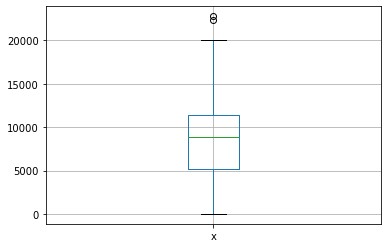

In [11]:
boxplot_TS = pd.DataFrame.boxplot(df_merged['TotalSteps'], return_type='both')


In [12]:
whiskers = [whiskers.get_ydata() for whiskers in boxplot_TS[1]["whiskers"]]

df_TS_up = df_merged.loc[df_merged['TotalSteps']>whiskers[1][1]].reset_index()
df_TS_up

,index,Id,Date,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
0,321,4388161847,2016-05-07,22770,17.540001,120,56,260,508,4022,472.0
1,635,8053475328,2016-04-23,22359,17.190001,125,14,223,741,3554,331.0


 A pesar de ser considerados outliers, podemos entender que la medicion es correcta, por lo que no alteraremos dichos datos

,index,Id,Date,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
0,457,5577150313,2016-04-17,12231,9.14,200,37,159,525,4552,549.0
1,471,5577150313,2016-05-01,13368,9.99,194,72,178,499,4546,379.0
2,491,6117666160,2016-04-21,19542,15.01,11,19,294,579,4900,508.0


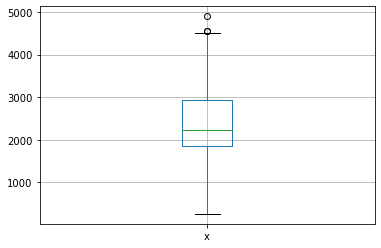

In [13]:
boxplot_kCal = pd.DataFrame.boxplot(df_merged['Calories'], return_type='both')
whiskers1 = [whiskers.get_ydata() for whiskers in boxplot_kCal[1]["whiskers"]]
df_kCal_up = df_merged.loc[df_merged['Calories']>whiskers1[1][1]].reset_index()
df_kCal_up


En este caso, resulta más preocupante que el consumo de calorías por debajo de 1000 Kcal no sea un outlier. Difícilmente un cuerpo humano gasta menos de 1200 Kcal en estado basal, por lo que las mediciones por debajo de este número indican un mal registro de las calorías. Por ello eliminaremos todos los registros que queden por debajo de la media menos un medio de la desviación estándar

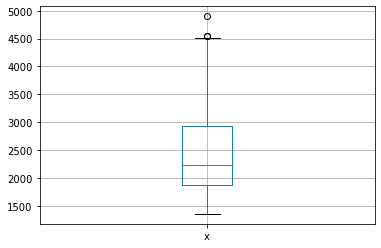

In [14]:
 df_merged = df_merged.loc[df_merged['Calories']> (df_merged.Calories.mean() - 1.5 * df_merged.Calories.std())]
boxplot_kCal = pd.DataFrame.boxplot(df_merged['Calories'], return_type='both')


Por ultimo, estudiamos la variable 'MinutesSleep'

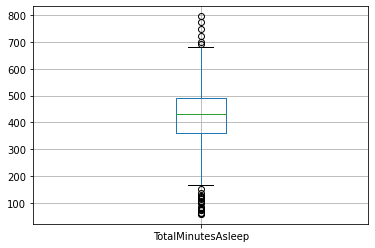

In [15]:
boxplot_MS = df_merged.boxplot(column=['TotalMinutesAsleep'], return_type='both')
whiskers2 = [whiskers.get_ydata() for whiskers in boxplot_MS[1]["whiskers"]]

In [16]:
df_MS_up = df_merged.loc[df_merged['TotalMinutesAsleep']>whiskers2[1][1]].reset_index()
df_MS_up


,index,Id,Date,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
0,5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,700.0
1,51,1644430081,2016-05-02,3758,2.73,1,7,148,682,2580,796.0
2,79,1844505072,2016-04-30,4014,2.67,0,0,184,218,1763,722.0
3,92,1927972279,2016-04-12,678,0.47,0,0,55,734,2220,750.0
4,275,4319703577,2016-04-23,4935,3.31,0,0,233,546,1945,692.0
5,439,5553957443,2016-04-30,1202,0.78,0,0,84,506,1463,775.0


En este caso, nos desharemos de los outliers tanto por arria como por abajo ya que, en ambos casos, parece deberse a un error de medicion.

In [17]:
df_merged = df_merged.loc[df_merged['TotalMinutesAsleep']>whiskers2[0][1]].reset_index()


In [18]:
df_merged = df_merged.loc[df_merged['TotalMinutesAsleep']<whiskers2[1][1]].reset_index()


### 4 Analisis de los datos

Estudiamos la normalidad de TotalSteps

<AxesSubplot:>

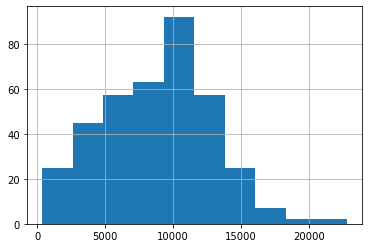

In [19]:
df_merged.TotalSteps.hist()

In [20]:
stats.shapiro(df_merged.TotalSteps)

ShapiroResult(statistic=0.9868819117546082, pvalue=0.0018110732780769467)

Rechazamos la hipotesis nula. La distribucion no es normal. Realizamos los mismos tests para calories y minutos de sueno.

<AxesSubplot:>

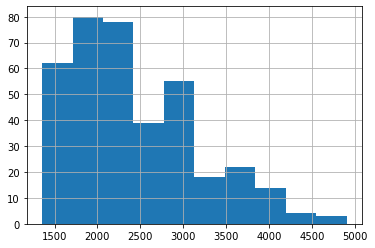

In [21]:
df_merged.Calories.hist()

In [22]:
stats.shapiro(df_merged.Calories)

ShapiroResult(statistic=0.939013659954071, pvalue=2.786465329307486e-11)

<AxesSubplot:>

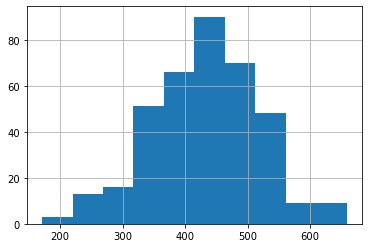

In [23]:
df_merged.TotalMinutesAsleep.hist()

In [24]:
stats.shapiro(df_merged.TotalMinutesAsleep)

ShapiroResult(statistic=0.9945306777954102, pvalue=0.20215818285942078)

Los test nos impiden asumir normalidad en la distribucion de las tres variables analizadas. Sin embargo, el teorema del limite central nos permite asumir dicha normalidad y realizar ciertos tests.

Estudiamos la correlacion entre las diferentes variables:

In [25]:
df_merged = df_merged.drop(['level_0', 'index', 'Id'], axis=1)



In [26]:
df_merged.corr()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
TotalSteps,1.000000,0.978660,0.537344,0.557055,0.339776,-0.269008,0.351440,-0.265932
TotalDistance,0.978660,1.000000,0.572206,0.539088,0.308551,-0.269241,0.486314,-0.231362
VeryActiveMinutes,0.537344,0.572206,1.000000,0.310706,-0.273779,-0.066145,0.615788,-0.120325
FairlyActiveMinutes,0.557055,0.539088,0.310706,1.000000,-0.083967,-0.087891,0.147936,-0.334053
LightlyActiveMinutes,0.339776,0.308551,-0.273779,-0.083967,1.000000,-0.506962,0.008884,0.071294
SedentaryMinutes,-0.269008,-0.269241,-0.066145,-0.087891,-0.506962,1.000000,-0.063182,-0.505317
Calories,0.351440,0.486314,0.615788,0.147936,0.008884,-0.063182,1.000000,0.031266
TotalMinutesAsleep,-0.265932,-0.231362,-0.120325,-0.334053,0.071294,-0.505317,0.031266,1.000000


Podemos ver que, de acuerdo con los datos, la correlacion entre el consumo de calorias y los minutos de sueno no estan particularmente correlacionados. Si podriamos encontrar mas relevante, la correlacion que exite entre los minutos de ejercicio muy activo como el factor mas correlacionado con la quema de calorias. Podemos visualizar dichas correlaciones:

#### VeryActiveMinutes- Calories

Text(0, 0.5, 'Calories')

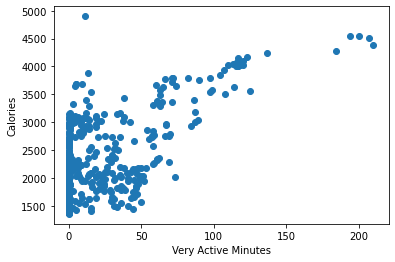

In [27]:
plt.scatter(df_merged.VeryActiveMinutes, df_merged.Calories)
plt.xlabel("Very Active Minutes")
plt.ylabel("Calories")

#### TotalMinutesAsleep-Calories

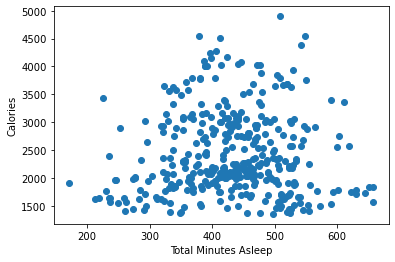

In [28]:
plt.scatter(df_merged.TotalMinutesAsleep, df_merged.Calories)
plt.xlabel("Total Minutes Asleep")
plt.ylabel("Calories")
plt.show()

 #### TotalminutesAsleep-SedentaryMinutes

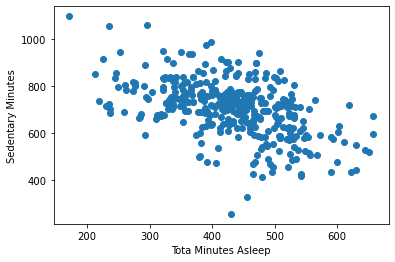

In [29]:
plt.scatter(df_merged.TotalMinutesAsleep, df_merged.SedentaryMinutes)
plt.xlabel("Tota Minutes Asleep")
plt.ylabel("Sedentary Minutes")
plt.show()

Resulta ciertamente relevante la correlacion inversa que existe entre el total del tiempo dormido con respecto al tiempo de actividad sedentaria. Esto puede apuntar a aquellos qu duermen menos horas al dia tenderan a una mayor actividad sedenaria. Para profundizar en ello deberemos realizar nuevas operaciones.

Para ello, clasificaremos a los registros entre sleepers 'dormidores' y non sleepers 'no dormidores' en base a si se encuentran por encima o por debajo de la media. Esto con el objetivo de identificar si existen diferencias significativas entre ambos grupos y el consumo de calorias y, como hemos visto, de minutos de actividad sedentaria.

In [30]:
df_merged['type'] = 'Non_type'

df_merged.loc[(df_merged['TotalMinutesAsleep'] > statistics.mean(df_merged.TotalMinutesAsleep)), 'type'] = 'Sleepers'
df_merged.loc[(df_merged['TotalMinutesAsleep'] < statistics.mean(df_merged.TotalMinutesAsleep)), 'type'] = 'NonSleepers'


<AxesSubplot:>

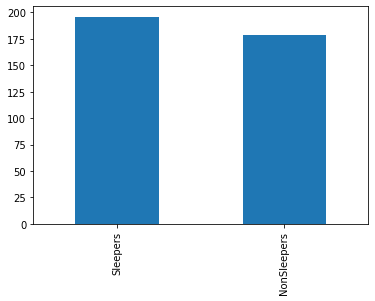

In [31]:
df_merged.type.value_counts().plot(kind='bar')

In [32]:
df_merged.groupby(['type']).mean()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep
type,,,,,,,,
NonSleepers,9634.743017,6.772458,32.972067,24.134078,213.435754,752.938547,2463.575419,359.424581
Sleepers,8124.918367,5.773776,20.474490,13.801020,231.673469,661.005102,2409.903061,496.984694


Primero, con respecto al consumo de calorias, visualizamos y comprobamos la homocedasticidad mediante la priueba de levenne.

<AxesSubplot:xlabel='type', ylabel='Calories'>

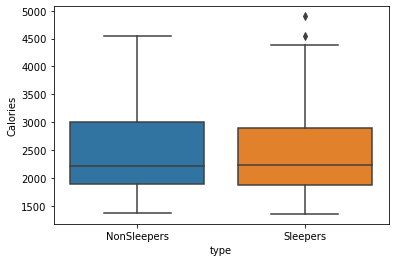

In [33]:
sns.boxplot(x='type', y='Calories', data=df_merged)

In [34]:
Cal_sleep = df_merged.loc[df_merged.type == 'Sleepers', 'Calories']
Cal_nonsleep = df_merged.loc[df_merged.type == 'NonSleepers', 'Calories']

Cal_test = stats.levene(Cal_sleep, Cal_nonsleep)
Cal_test

LeveneResult(statistic=1.1920062563925338, pvalue=0.27562994544299396)

En efecto, vemos que no podemos rechazar la hipotesis nula por lo que podemos asumir homocedasticidad en los datos. A continuacion comprobamos si existe significancia estadistica mediante un t test.

In [35]:
stats.ttest_ind(Cal_sleep, Cal_nonsleep)

Ttest_indResult(statistic=-0.6987471664318555, pvalue=0.4851454876279291)

Coomo era previsible, no existe diferencia estadistica

Ahora realizamos un proceso analogo con respecto a los minutos de actividad sedentaria.

<AxesSubplot:xlabel='type', ylabel='SedentaryMinutes'>

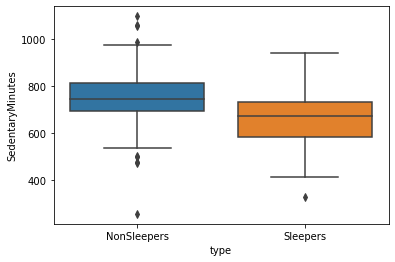

In [36]:
sns.boxplot(x='type', y='SedentaryMinutes', data=df_merged)

In [37]:
Sed_sleep = df_merged.loc[df_merged.type == 'Sleepers', 'SedentaryMinutes']
Sed_nonsleep = df_merged.loc[df_merged.type == 'NonSleepers', 'SedentaryMinutes']

Sed_test = stats.levene(Sed_sleep, Sed_nonsleep, center='median')
Sed_test

LeveneResult(statistic=3.2398647517906918, pvalue=0.07267448128980902)

Podemos asumir homocedasticidad en los datos. Realizamos la prueba T

In [38]:
stats.ttest_ind(Sed_sleep, Sed_nonsleep)

Ttest_indResult(statistic=-8.081644553796927, pvalue=8.989300176299431e-15)

En este caso, con un P-valor inferior a 0.05 si podemos asumir una diferencia estadisticament significativa entre las horas de sueno y el tiempo dedicado a actividades sedentarias.

### 6 Resolucion y conclusiones

A pesar de que la pregunta inicial no ha podido ser respondida ya que no hemos encontrado relevancia estadistica entre las calorias consumidas y las horas de sueno. Este estudio, con unos datos ciertamente limitados, nos ha permitido vislumbrar un fenomeno del que no sospechabamos al inicio, y es que si bien, las horas de sueno no necesariamente afectan al consumo de calorias, si que podemos establecer una relacion entre las horas de sueno y las horas dedicadas a actividades sedentarias. Esto podria tener una conclusion clara, a saber, que la falta de sueno promueve el sedentarismo. Dado lo limitado de los datos de inicio, no deberiamos llegar a conclusiones de forma tan precipitada, no obstante, ser conscientes de dicho fenomeno nos puede ayudar a definir futuras investigaciones con diferentes conjuntos de datos que traten del mismo tema.